# Module imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data and initial analisys

## head of the dataframe

In [3]:
data = pd.read_csv('../data/raw/heart_cleveland_upload.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## columns description from kaggle

There are 13 attributes

- age: age in years
- sex: sex (1 = male; 0 = female)
- cp: chest pain type
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
    - Value 0: upsloping
    - Value 1: flat
    - Value 2: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect and the label
- condition: 0 = no disease, 1 = disease

## categorical/numerical/target

categorical: sex, cp, fbs, restecg, exang, slope, ca, thal

numerical: age, trestbps, chol, thalach, oldpeak

target: condition

## info and describe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


Всего 297 строк, все переменные кроме oldpeak принимают целочисленные значения. Пропуски в данных отсутствуют.

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Всего 297 строк, все переменные кроме oldpeak принимают целочисленные значения. Пропуски в данных отсутствуют. 

# More detailed feature analisys

## correlations

In [23]:
data_features = data.drop(columns = 'condition')

### all

<AxesSubplot:>

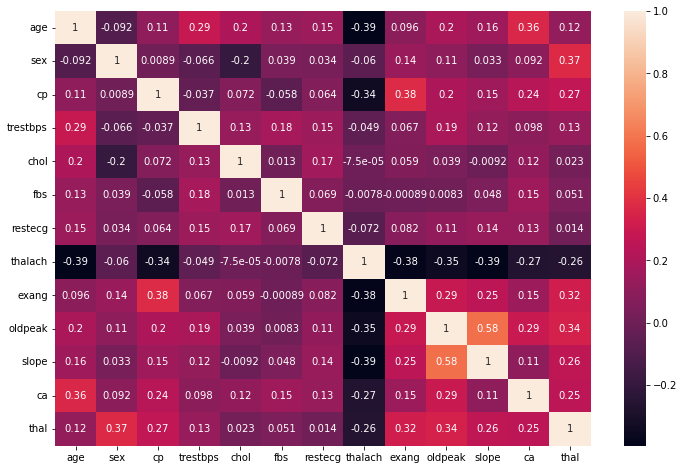

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_features.corr(), annot=True)

### corr > theshold

<AxesSubplot:>

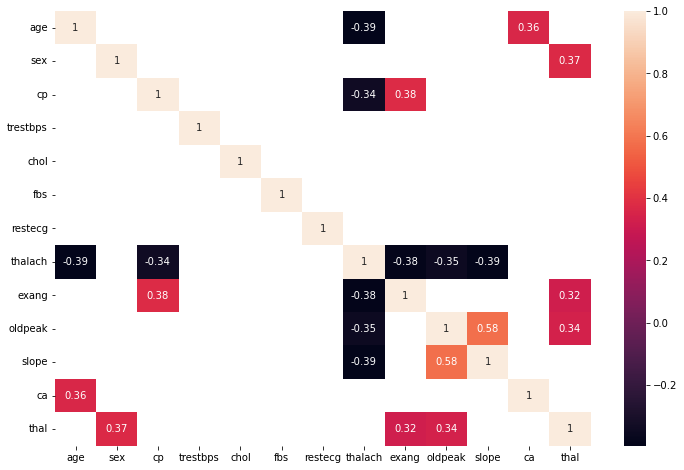

In [27]:
threshold = 0.3

plt.figure(figsize=(12, 8))
sns.heatmap(data_features.corr()[data_features.corr().abs() >= threshold], annot=True)


### the most correlated pairs of features

In [36]:
most_corr_pairs = data_features.corr().abs().unstack().sort_values(ascending=False)
most_corr_pairs[most_corr_pairs < 1].head(10)


oldpeak  slope      0.579037
slope    oldpeak    0.579037
age      thalach    0.394563
thalach  age        0.394563
slope    thalach    0.389307
thalach  slope      0.389307
         exang      0.384368
exang    thalach    0.384368
         cp         0.377525
cp       exang      0.377525
dtype: float64

### the most correlated features with target

In [41]:
most_corr_with_target = data.corr().abs()['condition'].sort_values(ascending = False)
most_corr_with_target[most_corr_with_target < 1].head(10)


thal       0.520516
ca         0.463189
oldpeak    0.424052
thalach    0.423817
exang      0.421355
cp         0.408945
slope      0.333049
sex        0.278467
age        0.227075
restecg    0.166343
Name: condition, dtype: float64

## categorical features

In [10]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


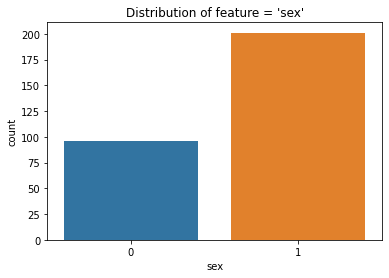

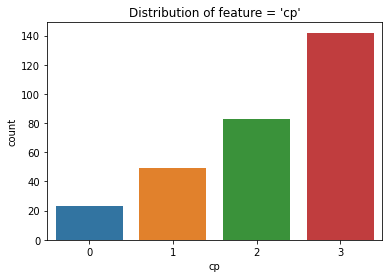

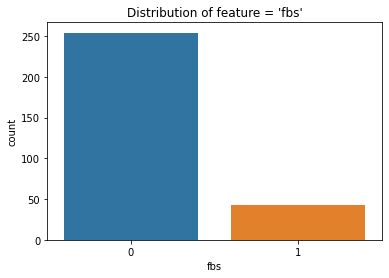

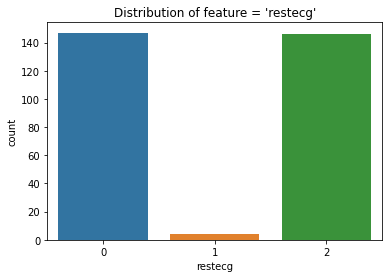

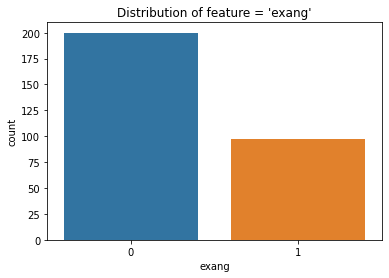

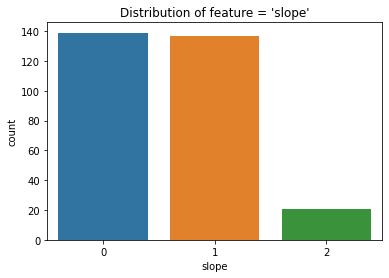

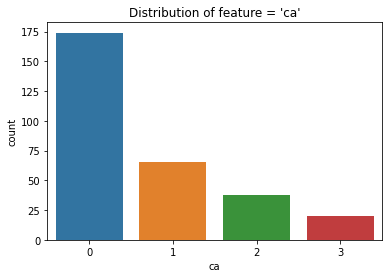

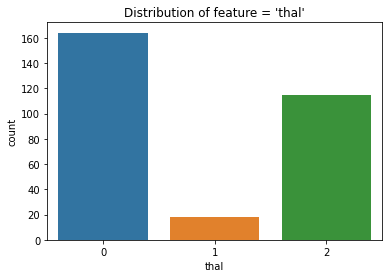

In [16]:
for feature in categorical_features:
    sns.countplot(x = data[feature])
    plt.title(f'Distribution of {feature = }')
    plt.show()

## numerical features

In [14]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

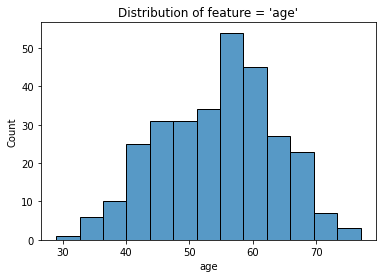

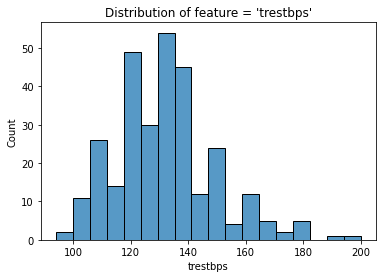

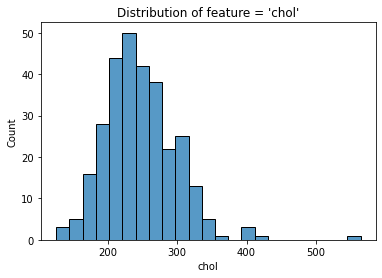

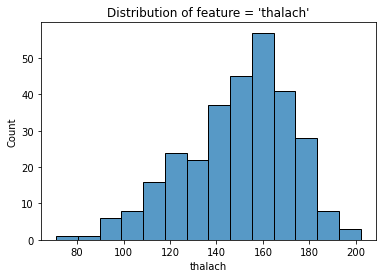

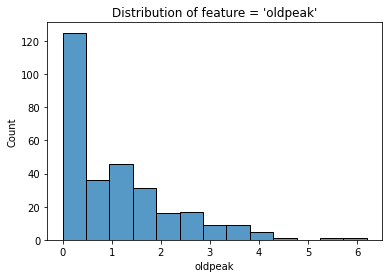

In [17]:
for feature in numerical_features:
    sns.histplot(data[feature])
    plt.title(f'Distribution of {feature = }')
    plt.show()